# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Overall Conclusions



The traditional understanding of temperature and latitude is reinforced by the data found in the API. The closer a city is to the equator, the higher the average temperature. However, the idea of constantly stormy tropics is not backed up by this data. Linear regressions for both hemispheres show wind speed increasing further away from the equator. It's expected seasonal storm activity would impact these conclusions during hurricane and monsoon season, but those exact impacts are outside of the purpose of this data. Cloudiness drops in the extreme north and south. This could be due to the characteristics of Arctic and Antarctic climates.

Of note is large numbers of cities that have high humidity and full cloud coverage. While outside the bounds of this data set, these facts could indicate that, regardless of other factors, cities arise in areas with high humidity and an active water cycle, i.e., waterways and coastlines. Trade, tourism and access to water as a transportation mechanism could all be reasons for this.

## Recommendations
Further studies or data sets that contain information on extreme weather events, population densities versus water access and the characteristics of Arctic and Antarctic climates should be examined to see if they reinforce these conclusions.

### Individual conclusions also follow each pair of linear regressions.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
## Build URL for OpenWeather.org API calls
# This project will use openweather.org's Current Weather Data API. The documentation for this API is located at:
# https://openweathermap.org/current

# The basecity_url is the API call url with no parameters
basecity_url = 'http://api.openweathermap.org/data/2.5/weather?'

#api_w_key is both the parameter 'appid' and the value held in 'appid'
#'appid' holds the API key. For security purposes this is in a different file
# and held in the variable 'weather_api_key' 
api_w_key=f'appid={weather_api_key}'

#temp_units is the value that placed in the 'units' parameter
temp_units = 'imperial'

#units is both the parameter for 'units' and the value held in 'units'
units = f'&units={temp_units}'

#rcity_url is build using the proceeding variables and ends with the string '&q='
#city names will be placed in the url after this string using a loop.
rcity_url = basecity_url + api_w_key + units + '&q='
rcity_url

'http://api.openweathermap.org/data/2.5/weather?appid=ad64a7587652ab930aed20db8dd6bd95&units=imperial&q='

In [4]:
utime = int(time.time())
utime

1666605983

In [5]:
##Weather Check for Each City

#Lists to hold values returned from API responses
#Location of each element in the API response is commented out after each list.
#This is for documentation purposes only.
City_Name = []   #['name']
Latitudes = []   #['coord']['lat']
Longitudes = []  #['coord']['lon']
Temperature = [] #['main']['temp']
Max_Temp = []    #['main']['temp_max']
Wind_Speed = []  #['wind']['speed']
Humidity = []    #['main']['humidity']
Cloudiness =[]   #['clouds']['all']
Country = [] #['sys']['country']
Date = []
#Beginning values for variables used to create the print log 
Record_Num = 1
Set_Num = 1

#Print header for print log
print('Beginning Weather Check Per City')
print('--------------------------------')


for city in cities:
    weather_response = requests.get(rcity_url + city).json()
    try:
        print(f'Processing Record# {Record_Num} of Set# {Set_Num} City Name:  {city}')
        City_Name.append(weather_response['name'])
        Latitudes.append(weather_response['coord']['lat'])
        Longitudes.append(weather_response['coord']['lon'])
        Temperature.append(weather_response['main']['temp'])
        Max_Temp.append(weather_response['main']['temp_max'])
        Wind_Speed.append(weather_response['wind']['speed'])
        Humidity.append(weather_response['main']['humidity'])
        Cloudiness.append(weather_response['clouds']['all'])
        Country.append(weather_response['sys']['country'])
        Date.append(utime)
        Record_Num = Record_Num + 1
        if Record_Num == 51:
            Set_Num = Set_Num +1
            Record_Num = 1
    except:
        print('No city name returned....skiping')
        pass

Beginning Weather Check Per City
--------------------------------
Processing Record# 1 of Set# 1 City Name:  rikitea
Processing Record# 2 of Set# 1 City Name:  moose factory
Processing Record# 3 of Set# 1 City Name:  masindi
Processing Record# 4 of Set# 1 City Name:  vaini
Processing Record# 5 of Set# 1 City Name:  albany
Processing Record# 6 of Set# 1 City Name:  punta arenas
Processing Record# 7 of Set# 1 City Name:  georgetown
Processing Record# 8 of Set# 1 City Name:  taolanaro
No city name returned....skiping
Processing Record# 8 of Set# 1 City Name:  khatanga
Processing Record# 9 of Set# 1 City Name:  san patricio
Processing Record# 10 of Set# 1 City Name:  smithers
Processing Record# 11 of Set# 1 City Name:  new norfolk
Processing Record# 12 of Set# 1 City Name:  qaanaaq
Processing Record# 13 of Set# 1 City Name:  lata
Processing Record# 14 of Set# 1 City Name:  fortuna
Processing Record# 15 of Set# 1 City Name:  atuona
Processing Record# 16 of Set# 1 City Name:  meulaboh
Proces

Processing Record# 29 of Set# 3 City Name:  mitsamiouli
Processing Record# 30 of Set# 3 City Name:  hermiston
Processing Record# 31 of Set# 3 City Name:  ballina
Processing Record# 32 of Set# 3 City Name:  kroya
Processing Record# 33 of Set# 3 City Name:  romny
Processing Record# 34 of Set# 3 City Name:  safaga
Processing Record# 35 of Set# 3 City Name:  ashtabula
Processing Record# 36 of Set# 3 City Name:  ruatoria
No city name returned....skiping
Processing Record# 36 of Set# 3 City Name:  marale
Processing Record# 37 of Set# 3 City Name:  port-cartier
Processing Record# 38 of Set# 3 City Name:  arraial do cabo
Processing Record# 39 of Set# 3 City Name:  grand river south east
No city name returned....skiping
Processing Record# 39 of Set# 3 City Name:  kakogawa
Processing Record# 40 of Set# 3 City Name:  tiksi
Processing Record# 41 of Set# 3 City Name:  torbay
Processing Record# 42 of Set# 3 City Name:  barrow
Processing Record# 43 of Set# 3 City Name:  xining
Processing Record# 44 o

Processing Record# 19 of Set# 6 City Name:  turukhansk
Processing Record# 20 of Set# 6 City Name:  isangel
Processing Record# 21 of Set# 6 City Name:  tuktoyaktuk
Processing Record# 22 of Set# 6 City Name:  cherskiy
Processing Record# 23 of Set# 6 City Name:  hoquiam
Processing Record# 24 of Set# 6 City Name:  tiznit
Processing Record# 25 of Set# 6 City Name:  noumea
Processing Record# 26 of Set# 6 City Name:  arman
Processing Record# 27 of Set# 6 City Name:  ozernovskiy
Processing Record# 28 of Set# 6 City Name:  richards bay
Processing Record# 29 of Set# 6 City Name:  port macquarie
Processing Record# 30 of Set# 6 City Name:  doha
Processing Record# 31 of Set# 6 City Name:  hereford
Processing Record# 32 of Set# 6 City Name:  sao jose de ribamar
Processing Record# 33 of Set# 6 City Name:  nanortalik
Processing Record# 34 of Set# 6 City Name:  linchuan
No city name returned....skiping
Processing Record# 34 of Set# 6 City Name:  sur
Processing Record# 35 of Set# 6 City Name:  chagda
No

Processing Record# 1 of Set# 9 City Name:  san andres
Processing Record# 2 of Set# 9 City Name:  aris
Processing Record# 3 of Set# 9 City Name:  ayan
Processing Record# 4 of Set# 9 City Name:  deputatskiy
Processing Record# 5 of Set# 9 City Name:  bang saphan
Processing Record# 6 of Set# 9 City Name:  biscarrosse
Processing Record# 7 of Set# 9 City Name:  huarmey
Processing Record# 8 of Set# 9 City Name:  namwala
Processing Record# 9 of Set# 9 City Name:  mount isa
Processing Record# 10 of Set# 9 City Name:  yialos
No city name returned....skiping
Processing Record# 10 of Set# 9 City Name:  cidreira
Processing Record# 11 of Set# 9 City Name:  dickson
Processing Record# 12 of Set# 9 City Name:  awjilah
Processing Record# 13 of Set# 9 City Name:  coquimbo
Processing Record# 14 of Set# 9 City Name:  pacific grove
Processing Record# 15 of Set# 9 City Name:  fairbanks
Processing Record# 16 of Set# 9 City Name:  virginia beach
Processing Record# 17 of Set# 9 City Name:  mahibadhoo
Processing

Processing Record# 36 of Set# 11 City Name:  bayir
Processing Record# 37 of Set# 11 City Name:  tawkar
No city name returned....skiping
Processing Record# 37 of Set# 11 City Name:  windsor
Processing Record# 38 of Set# 11 City Name:  kumluca
Processing Record# 39 of Set# 11 City Name:  ca mau
Processing Record# 40 of Set# 11 City Name:  ahipara
Processing Record# 41 of Set# 11 City Name:  asau
Processing Record# 42 of Set# 11 City Name:  quanzhou
Processing Record# 43 of Set# 11 City Name:  lubben
Processing Record# 44 of Set# 11 City Name:  samarai
Processing Record# 45 of Set# 11 City Name:  shellbrook
Processing Record# 46 of Set# 11 City Name:  acapulco
Processing Record# 47 of Set# 11 City Name:  belaya gora
Processing Record# 48 of Set# 11 City Name:  addis zemen
No city name returned....skiping
Processing Record# 48 of Set# 11 City Name:  shahrud
Processing Record# 49 of Set# 11 City Name:  shingu
Processing Record# 50 of Set# 11 City Name:  cabedelo
Processing Record# 1 of Set#

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
##Create DataFrame
# Create dictionary named 'City_Weather_Dict' based on lists populated by API responses.
City_Weather_Dict = {
                    "City": City_Name,
                    "Lat": Latitudes,
                    "Long": Longitudes,
                    "Max Temp": Max_Temp,
                    "Humidity": Humidity,
                    "Cloudiness": Cloudiness,
                    "Wind Speed": Wind_Speed,
                    "Country": Country,
                    "Date": Date
                    
    
}
#Create DataFrame based on City_Weather_Dict
City_Weather_Data = pd.DataFrame(City_Weather_Dict)
City_Weather_Data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,72.19,83,10,9.46,PF,1666605983
1,Moose Factory,51.2585,-80.6094,50.36,94,51,5.08,CA,1666605983
2,Masindi,1.6744,31.7150,83.05,46,2,5.46,UG,1666605983
3,Vaini,-21.2000,-175.2000,71.76,64,75,12.66,TO,1666605983
4,Albany,42.6001,-73.9662,54.27,79,100,3.18,US,1666605983
...,...,...,...,...,...,...,...,...,...
575,Laas,46.6166,10.7002,56.35,91,100,3.94,IT,1666605983
576,Quzhou,28.9594,118.8686,64.38,43,100,8.32,CN,1666605983
577,Galveston,29.3669,-94.9669,77.18,80,75,16.11,US,1666605983
578,Akner,39.5349,46.3073,59.59,27,0,4.05,AM,1666605983


In [7]:
##Save DataFrame 'City_Weather_Data' as csv
City_Weather_Data.to_csv(f"../{output_data_file}", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
# Save the indices to the variable 'hdex'
# If there are no cities with a humidity >100% the hdex will be empty
hdex = City_Weather_Data.index[City_Weather_Data[['Humidity'][0]] > 100]
hdex

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the 'City_Weather_Data DataFrame', that is not
# affected by any dropped data.
# We will name the new DataFrame 'clean_city_data'
# Regardless of whether 'hdex' is empty or not, we will place it in the drop() function.
# Our cities are generated randomly. The next time the cities are generated if there is a city
# with a humidity >100 it will be dropped without a code change or code addition.
clean_city_data = City_Weather_Data.drop(hdex,axis=0,inplace=False)
clean_city_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,72.19,83,10,9.46,PF,1666605983
1,Moose Factory,51.2585,-80.6094,50.36,94,51,5.08,CA,1666605983
2,Masindi,1.6744,31.7150,83.05,46,2,5.46,UG,1666605983
3,Vaini,-21.2000,-175.2000,71.76,64,75,12.66,TO,1666605983
4,Albany,42.6001,-73.9662,54.27,79,100,3.18,US,1666605983
...,...,...,...,...,...,...,...,...,...
575,Laas,46.6166,10.7002,56.35,91,100,3.94,IT,1666605983
576,Quzhou,28.9594,118.8686,64.38,43,100,8.32,CN,1666605983
577,Galveston,29.3669,-94.9669,77.18,80,75,16.11,US,1666605983
578,Akner,39.5349,46.3073,59.59,27,0,4.05,AM,1666605983


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### For scatter plots and linear regressions
* Max Temperature Markers = <font color='red'>RED</font>
* Humidity Markers = <font color='aqua'>AQUA</font>
* Cloudiness Markers = <font color='lightsteelblue'>LIGHT STEEL BLUE</font>
* Wind Speed Markers = <font color='chartreuse'>CHARTREUSE</font>
* Regression lines and formulas are colored <font color='slategray'>SLATE GRAY</font>

In [10]:
## Library formatting for today's date to use in chart titles
#Time Library formatting = time.strftime("%m-%d-%Y")

## Latitude vs. Temperature Plot

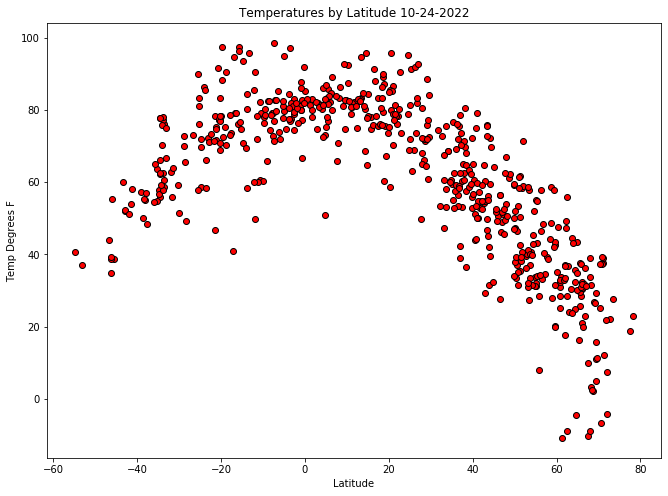

In [11]:
plt.figure(figsize=(11, 8))
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], marker="o", facecolors="red", edgecolors="black")
plt.title(f'Temperatures by Latitude {time.strftime("%m-%d-%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Temp Degrees F")

#Save image to local directory
plt.savefig('../output_data/Lat_vs_Temp.png')

plt.show()


## Latitude vs. Humidity Plot

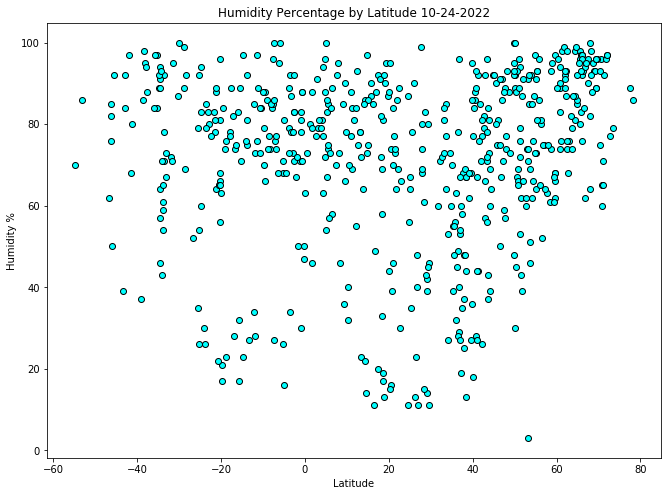

In [12]:
plt.figure(figsize=(11, 8))
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], marker="o",
            facecolors="aqua", edgecolors="black")
plt.title(f'Humidity Percentage by Latitude {time.strftime("%m-%d-%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

#Save image to local directory
plt.savefig('../output_data/Lat_vs_Humidity.png')

plt.show()

## Latitude vs. Cloudiness Plot

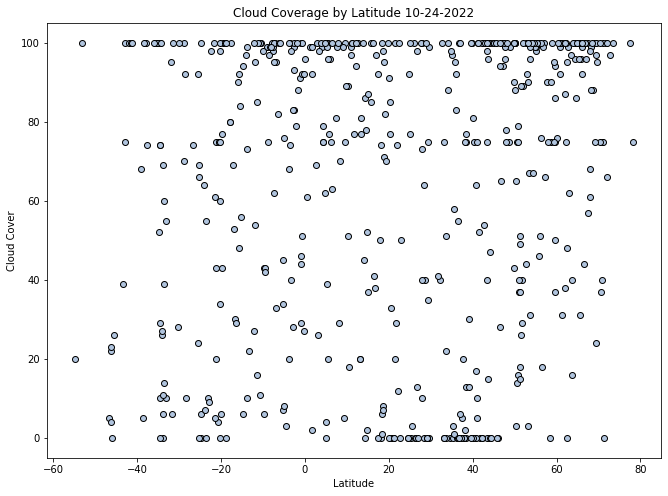

In [13]:
plt.figure(figsize=(11, 8))
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], marker="o",
            facecolors="lightsteelblue", edgecolors="black")
plt.title(f'Cloud Coverage by Latitude {time.strftime("%m-%d-%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover")

#Save image to local directory
plt.savefig('../output_data/Lat_vs_Cloudiness.png')

plt.show()

## Latitude vs. Wind Speed Plot

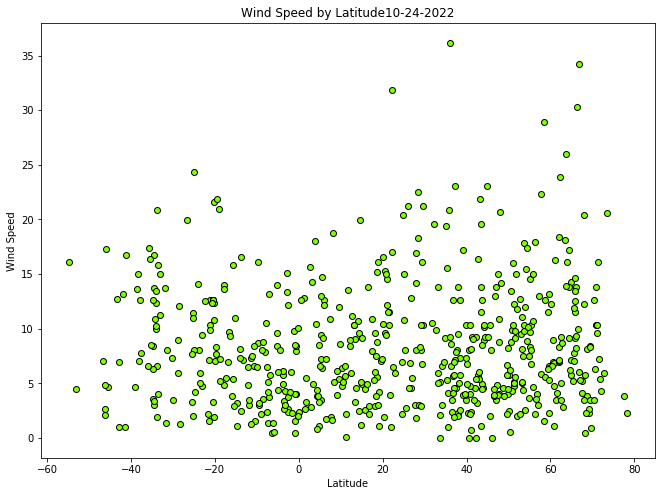

In [14]:
plt.figure(figsize=(11, 8))
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], marker="o",
            facecolors="chartreuse", edgecolors="black")
plt.title(f'Wind Speed by Latitude{time.strftime("%m-%d-%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Save image to local directory
plt.savefig('../output_data/Lat_vs_WindSpd.png')

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7456968488606347


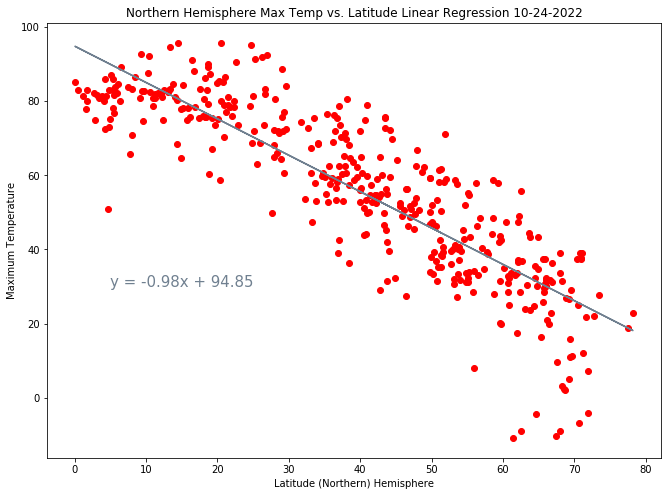

In [15]:
## Create x and y values
x_values = clean_city_data[clean_city_data[['Lat'][0]] > 0]['Lat']
y_values = clean_city_data[clean_city_data[['Lat'][0]] > 0]['Max Temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(11, 8))
plt.scatter(x_values,y_values, facecolors = 'red')

# Plot regression line
plt.plot(x_values,regress_values,"r-", color="slategray")
plt.annotate(line_eq,(5,30),fontsize=15,color="slategray")

# Label plot
plt.title(f'Northern Hemisphere Max Temp vs. Latitude Linear Regression {time.strftime("%m-%d-%Y")}')
plt.xlabel('Latitude (Northern) Hemisphere')
plt.ylabel('Maximum Temperature')

# Print r square value
print(f"R squared: {rvalue**2}")

#Save_Image
plt.savefig('../output_data/N_Hemi_Temp_Regression.png')

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.46831106497302255


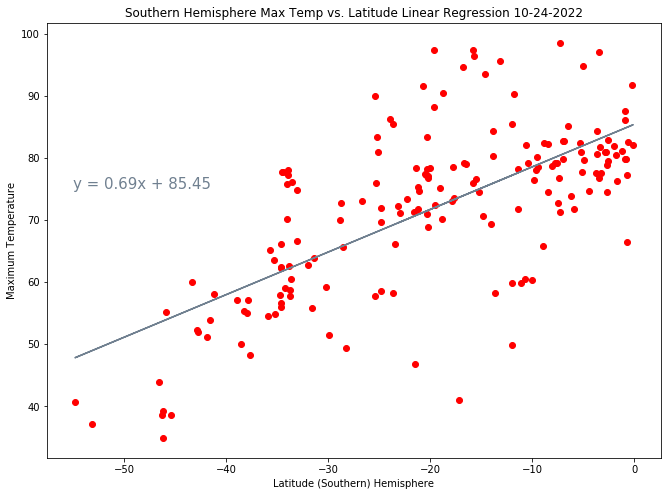

In [16]:
## Create x and y values
x_values = clean_city_data[clean_city_data[['Lat'][0]] < 0]['Lat']
y_values = clean_city_data[clean_city_data[['Lat'][0]] < 0]['Max Temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(11, 8))
plt.scatter(x_values,y_values, facecolors = 'red')

# Plot regression line
plt.plot(x_values,regress_values,"r-", color="slategray")
plt.annotate(line_eq,(-55,75),fontsize=15,color="slategray")

# Label plot
plt.title(f'Southern Hemisphere Max Temp vs. Latitude Linear Regression {time.strftime("%m-%d-%Y")}')
plt.xlabel('Latitude (Southern) Hemisphere')
plt.ylabel('Maximum Temperature')

# Print r square value
print(f"R squared: {rvalue**2}")

#Save image to local directory
plt.savefig('../output_data/S_Hemi_Temp_Regression.png')

# Show plot
plt.show()

# Temperature Linear Regressions
Both charts show that temperature rises as the latitude approaches zero. This confirms the traditional understanding that it gets warmer as you approach the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.0721490391875244


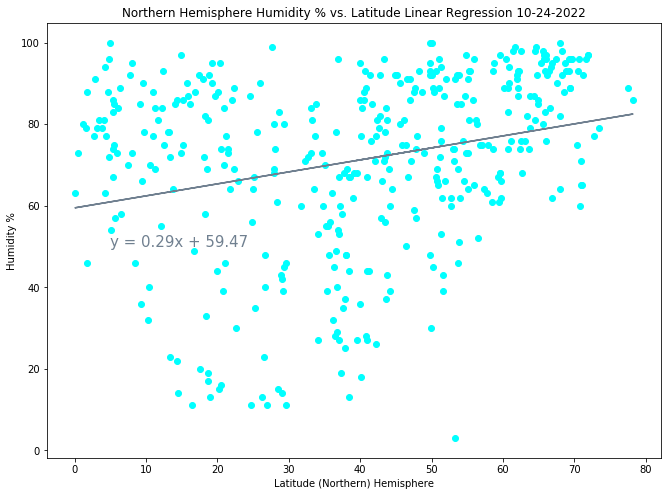

In [17]:
## Create x and y values
x_values = clean_city_data[clean_city_data[['Lat'][0]] > 0]['Lat']
y_values = clean_city_data[clean_city_data[['Lat'][0]] > 0]['Humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(11, 8))
plt.scatter(x_values,y_values, facecolors='aqua')

# Plot regression line
plt.plot(x_values,regress_values,"r-", color="slategray")
plt.annotate(line_eq,(5,50),fontsize=15,color="slategray")

# Label plot
plt.title(f'Northern Hemisphere Humidity % vs. Latitude Linear Regression {time.strftime("%m-%d-%Y")}')
plt.xlabel('Latitude (Northern) Hemisphere')
plt.ylabel('Humidity %')

# Print r square value
print(f"R squared: {rvalue**2}")

#Save_Image
plt.savefig('../output_data/N_Hemi_Humdity_Regression.png')

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.007606676859962454


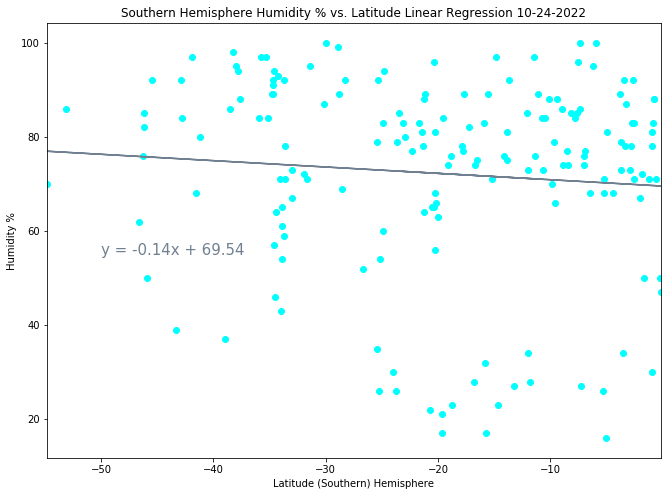

In [18]:
## Create x and y values
x_values = clean_city_data[clean_city_data[['Lat'][0]] < 0]['Lat']
y_values = clean_city_data[clean_city_data[['Lat'][0]] < 0]['Humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(11, 8))
plt.scatter(x_values,y_values, facecolors='aqua')

# Plot regression line
plt.plot(x_values,regress_values,"r-", color="slategray")
plt.annotate(line_eq,(-50,55),fontsize=15,color="slategray")

# Label plot
plt.title(f'Southern Hemisphere Humidity % vs. Latitude Linear Regression {time.strftime("%m-%d-%Y")}')
plt.xlabel('Latitude (Southern) Hemisphere')
plt.ylabel('Humidity %')

# Print r square value
print(f"R squared: {rvalue**2}")

#Save_Image
plt.savefig('../output_data/S_Hemi_Humdity_Regression.png')

# Show plot
plt.margins(x=0)
plt.show()

# Humidity Linear Regressions
Regardless of latitude, a high number of cities have high humidity values. There is actually a drop off of low humidity cities in the northern hemisphere as you get into the more northern latitudes. While outside the bounds of this data set, this could be an indication that, regardless of other factors, cities arise in areas with high humidity, i.e. waterways and coastlines. Trade, tourism and access to water could all be reasons for this.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.03608674299744446


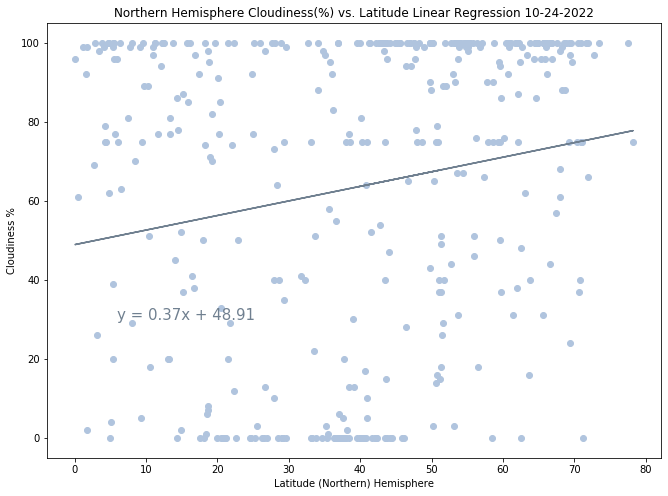

In [19]:
## Create x and y values
x_values = clean_city_data[clean_city_data[['Lat'][0]] > 0]['Lat']
y_values = clean_city_data[clean_city_data[['Lat'][0]] > 0]['Cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(11, 8))
plt.scatter(x_values,y_values, facecolors='lightsteelblue')

# Plot regression line
plt.plot(x_values,regress_values,"r-", color="slategray")
plt.annotate(line_eq,(6,30),fontsize=15,color="slategray")

# Label plot
plt.title(f'Northern Hemisphere Cloudiness(%) vs. Latitude Linear Regression {time.strftime("%m-%d-%Y")}')
plt.xlabel('Latitude (Northern) Hemisphere')
plt.ylabel('Cloudiness %')

# Print r square value
print(f"R squared: {rvalue**2}")

#Save_Image
plt.savefig('../output_data/N_Hemi_Cloudiness_Regression.png')

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.03337046681979442


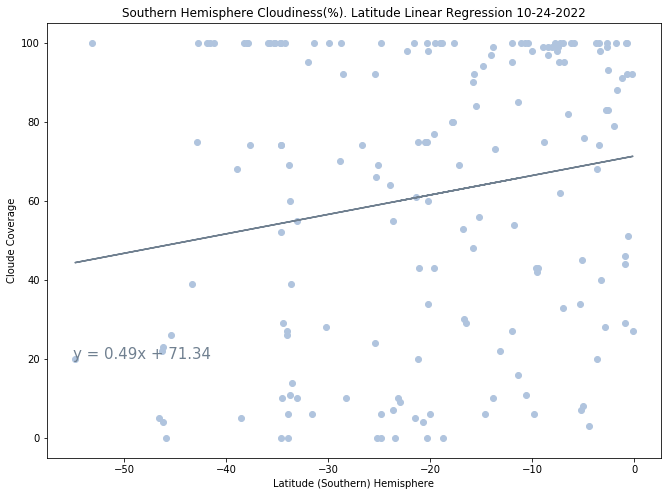

In [20]:
## Create x and y values
x_values = clean_city_data[clean_city_data[['Lat'][0]] < 0]['Lat']
y_values = clean_city_data[clean_city_data[['Lat'][0]] < 0]['Cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(11, 8))
plt.scatter(x_values,y_values, facecolors='lightsteelblue')

# Plot regression line
plt.plot(x_values,regress_values,"r-", color="slategray")
plt.annotate(line_eq,(-55,20),fontsize=15,color="slategray")

# Label plot
plt.title(f'Southern Hemisphere Cloudiness(%). Latitude Linear Regression {time.strftime("%m-%d-%Y")}')
plt.xlabel('Latitude (Southern) Hemisphere')
plt.ylabel('Cloude Coverage')

# Print r square value
print(f"R squared: {rvalue**2}")

#Save_Image
plt.savefig('../output_data/S_Hemi_Cloudiness_Regression.png')

# Show plot
plt.show()

# Cloudiness Linear Regressions
Both north and south hemisphers have a large number of cites that experience full cloud coverage. It would be interesting to look at a correlation between this and humidity. For both hemispheres, when the latitude of the city is furthest from zero, cloud cover drops. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.005324765753802999


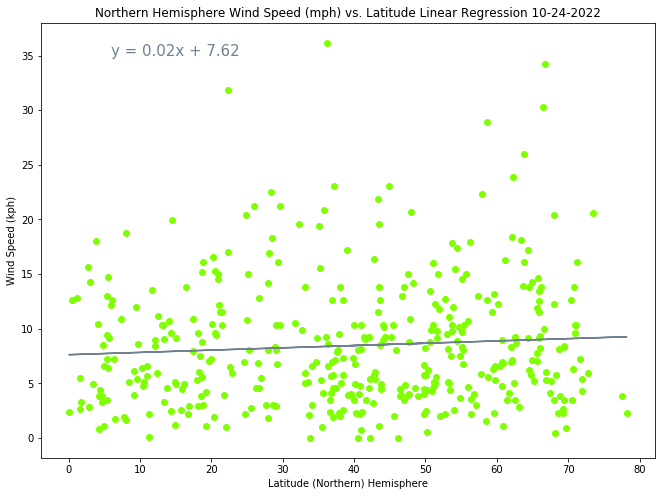

In [23]:
## Create x and y values
x_values = clean_city_data[clean_city_data[['Lat'][0]] > 0]['Lat']
y_values = clean_city_data[clean_city_data[['Lat'][0]] > 0]['Wind Speed']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(11, 8))
plt.scatter(x_values,y_values, facecolors='chartreuse')

# Plot regression line
plt.plot(x_values,regress_values,"r-", color="slategray")
plt.annotate(line_eq,(6,35),fontsize=15,color="slategray")

# Label plot
plt.title(f'Northern Hemisphere Wind Speed (mph) vs. Latitude Linear Regression {time.strftime("%m-%d-%Y")}')
plt.xlabel('Latitude (Northern) Hemisphere')
plt.ylabel('Wind Speed (kph)')

# Print r square value
print(f"R squared: {rvalue**2}")

#Save_Image
plt.savefig('../output_data/N_Hemi_WindSpd_Regression.png')

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.06520690750810632


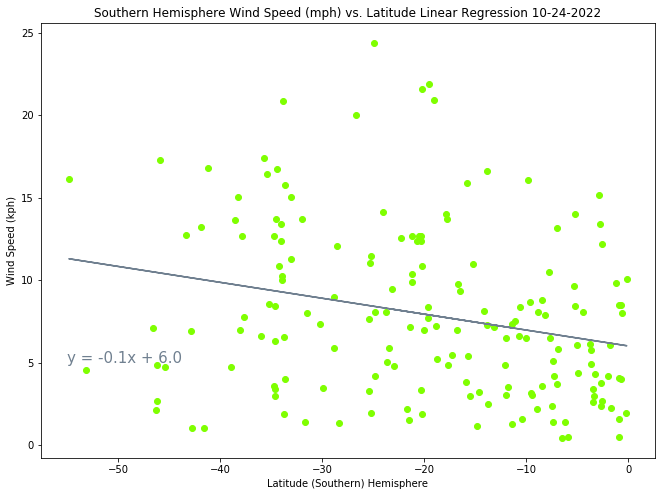

In [22]:
## Create x and y values
x_values = clean_city_data[clean_city_data[['Lat'][0]] < 0]['Lat']
y_values = clean_city_data[clean_city_data[['Lat'][0]] < 0]['Wind Speed']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(11, 8))
plt.scatter(x_values,y_values,facecolors='chartreuse')

# Plot regression line
plt.plot(x_values,regress_values,"r-", color="slategray")
plt.annotate(line_eq,(-55,5),fontsize=15,color="slategray")

# Label plot
plt.title(f'Southern Hemisphere Wind Speed (mph) vs. Latitude Linear Regression {time.strftime("%m-%d-%Y")}')
plt.xlabel('Latitude (Southern) Hemisphere')
plt.ylabel('Wind Speed (kph)')

# Print r square value
print(f"R squared: {rvalue**2}")

#Save_Image
plt.savefig('../output_data/S_Hemi_WindSpd_Regression.png')

# Show plot
plt.show()

# Wind speed Linear Regression
Wind speed rises, for both hemispheres as you move away from the equator. This goes against conventional wisdom and the idea of the stormy tropics. Also of note, is that the majority of cities report winds speeds of 15 kph or less. The decreasing density of wind speed greater than this indicates that several of these measurments may have been taken during weather events or storms. This is also backed up by a few outliers with wind speeds of 25 kph or more and one over 35kph